In [13]:
import sqlite3
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Dataset

In [14]:
# --- Offers Dataset
# TODO: change the offers dataset to one different from Turing Careers
with sqlite3.connect('./datasets/offers_dataset.db') as offers_conn:
    offers_frame = pd.read_sql('SELECT * FROM Offers', offers_conn, index_col='ID')

offers_frame.drop_duplicates(inplace=True)
offers_frame

,Name,Description,Language,LocationType,Location
ID,,,,,
1,Software Developer,Miniclip is a global leader in digital games w...,Italian,On-Site,"Genova, Liguria"
2,Junior Software Developer,"NETtoWORK, azienda italiana nata nel 2016, ope...",Italian,On-Site,17100 Savona
3,Software Developer,We are looking for talented and passionate peo...,Italian,On-Site,55100 Lucca
4,Software Developer,ARESYS is a R&D oriented company with nearly ...,Italian,On-Site,"Matera, Basilicata"
5,Senior Software Developer,Il/la Candidato/a dovrà padroneggiare: \n \n- ...,Italian,On-Site,"Catania, Sicilia"
6,SOFTWARE DEVELOPER,La passione ci guida in tutto ciò che facciamo...,Italian,On-Site,60030 Monsano
7,IBP Junior Algorithms Software Development,Pirelli is looking for the following profile t...,Italian,On-Site,"Bari, Puglia"
8,Unity game developer,Junior or SeniorWork from home! Literally alw...,Italian,Remote,None
9,Frontend,Esperienza richiesta : 3-10 anniConoscenze ric...,Italian,Remote,None


In [15]:
# --- Skills Dataset
with sqlite3.connect('./datasets/skills_dataset.db') as skills_conn:
    skills_frame = pd.read_sql('SELECT * FROM Skills', skills_conn, index_col='ID')
    
skills_frame

,SKILL,TYPE
ID,,
0,JavaScript,Programming Language
1,HTML,Programming Language
2,Python,Programming Language
3,SQL,Programming Language
4,TypeScript,Programming Language
...,...,...
95,APT,Tool
96,Unity 3D,Tool
97,Pacman,Tool


## Offers skill extraction

In [16]:
from utils import print_performance


@print_performance
def extract_skills(offers_df, skills_df):
    skill_list = [skill.lower() for skill in skills_df['SKILL'].tolist()]
    skill_vectors = []
    for skill in skill_list:
        presence_vector = offers_df.Description.map(lambda desc: skill in desc.lower()).rename(skill)
        skill_vectors.append(presence_vector)
    return pd.concat([vec for vec in skill_vectors], axis=1)   

In [17]:
skill_vector = extract_skills(offers_frame, skills_frame)
skill_vector

Done in 0.32


,javascript,html,python,sql,typescript,bash/shell,java,c#,c++,c,...,msbuild,ansible,chocolatey,composer,llvm's clang,apt,unity 3d,pacman,pnpm,css
ID,,,,,,,,,,,,,,,,,,,,,
1,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
2,False,False,True,False,False,False,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
3,True,True,False,True,False,False,True,False,False,True,...,False,False,False,False,False,False,False,False,False,True
4,False,False,True,False,False,False,False,False,True,True,...,False,False,False,False,False,False,False,False,False,False
5,True,True,False,True,False,False,True,True,False,True,...,False,False,False,False,False,False,False,False,False,True
6,False,False,False,True,False,False,True,False,False,True,...,False,False,False,False,False,False,False,False,False,False
7,False,False,True,False,False,False,True,False,False,True,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,True,False,False,False
9,True,True,False,False,False,False,True,False,False,True,...,False,False,False,False,False,False,False,False,False,True


## Distribution Analysis
Given that the dataset is imbalanced more data/better data should be acquired

In [18]:
# --- Unbalanced Data
skills_headers = skill_vector.columns.tolist()
skills_headers.remove('c')
skills_headers.remove('go')
skill_vector = skill_vector[skills_headers]

In [19]:
skill_counts = skill_vector.sum()
skill_counts.rename("Count", inplace=True)

javascript    14
html           9
python         9
sql           15
typescript     3
              ..
apt            4
unity 3d       1
pacman         0
pnpm           0
css           10
Name: Count, Length: 96, dtype: int64

In [20]:
def plot_skills(count_frame):
    plt.figure(figsize=(10, 10))
    sns.barplot(x=count_frame.values, y=count_frame.index, palette="viridis")
    plt.title("Distribution of Skills in the Dataset")
    plt.xlabel("Count")
    plt.ylabel("Skills")
    plt.show()

C:\Users\anton\AppData\Local\Temp\ipykernel_14892\1017160907.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=count_frame.values, y=count_frame.index, palette="viridis")


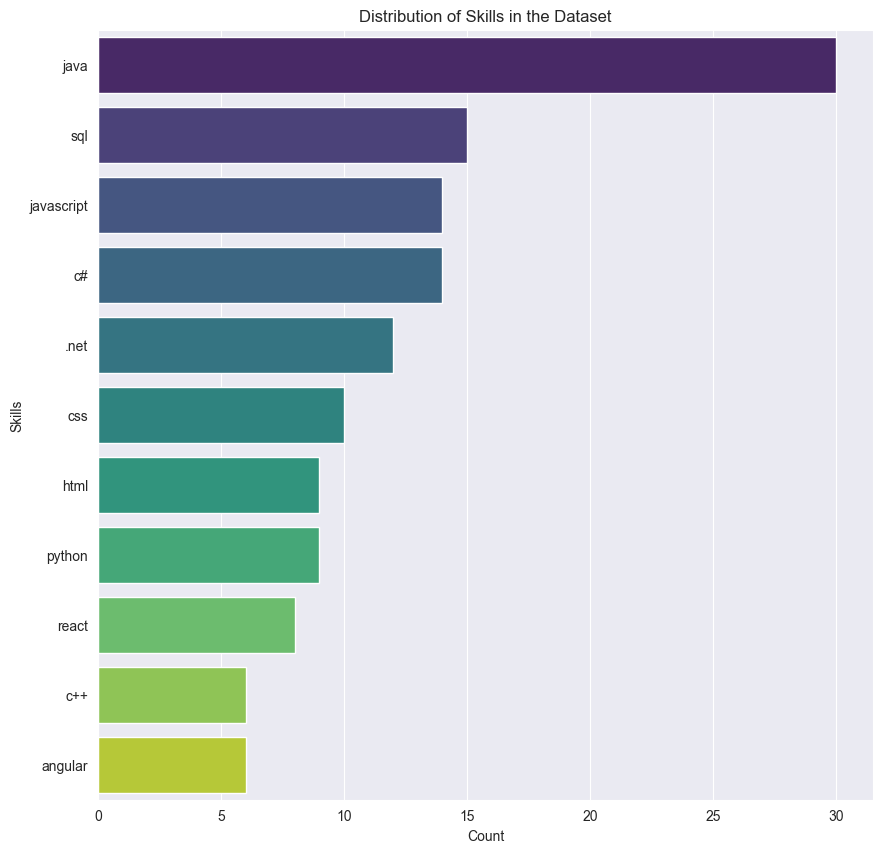

In [21]:
selected_skills = skill_counts[skill_counts >= 6].index
skill_vector = skill_vector[selected_skills]
skill_counts = skill_vector.sum()

plot_skills(skill_counts.sort_values(ascending=False))

## Association Rule Mining

### FP max Algorithm
One red-flag is that it doesn't show a single item set with HTML and CSS together.

In [22]:
from mlxtend.frequent_patterns import fpmax

@print_performance
def task_fp_max(vect):
    return fpmax(vect, use_colnames=True, min_support=0.111)

In [23]:
skill_sets = task_fp_max(skill_vector)
skill_sets

Done in 0.01


,support,itemsets
0,0.12,(c++)
1,0.12,(angular)
2,0.12,"(java, react, javascript)"
3,0.16,"(css, html, java, javascript)"
4,0.16,"(java, python)"
5,0.12,"(.net, java)"
6,0.12,"(sql, .net, c#)"
7,0.12,"(sql, java, javascript)"
8,0.18,"(java, c#)"


## Clustering Algorithm

## Export

In [24]:
with sqlite3.connect('./datasets/skill_sets.db') as out_conn:
    out_curs = out_conn.cursor()
    out_curs.execute('''
        CREATE TABLE IF NOT EXISTS SkillSets (
            ID INTEGER PRIMARY KEY,
            SKILLS TEXT
        )    
    ''')

    i = -1
    for skill_set in skill_sets['itemsets'].tolist():
        if len(skill_set) > 1: 
            skill_list = []
            
            for skill in skill_set:
                skill_list.append(skill)
                
            i += 1
            out_curs.execute('''INSERT INTO SkillSets VALUES (?, ?)''', (i, ', '.join(skill_list)))
            
    out_conn.commit()


IntegrityError: UNIQUE constraint failed: SkillSets.ID

In [ ]:
with sqlite3.connect('./datasets/skill_sets.db') as test_conn:
        test_frame = pd.read_sql('SELECT * FROM SkillSets', test_conn, index_col='ID')

test_frame